<a href="https://colab.research.google.com/github/ReanSchwarzer1/Notebooks/blob/master/NI_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving NihonFalcom.csv to NihonFalcom.csv


In [0]:
import io
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')
data = pd.read_csv(io.BytesIO(uploaded['NihonFalcom.csv']), index_col= 'Date', parse_dates=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-25,1336.0,1336.0,1310.0,1318.0,1284.133057,35100
2015-05-26,1327.0,1327.0,1301.0,1307.0,1273.415649,36300
2015-05-27,1305.0,1313.0,1281.0,1289.0,1255.878174,48500
2015-05-28,1284.0,1300.0,1280.0,1286.0,1252.955200,25500
2015-05-29,1285.0,1316.0,1285.0,1310.0,1276.338745,23200
...,...,...,...,...,...,...
2020-05-19,1158.0,1198.0,1143.0,1181.0,1181.000000,31000
2020-05-20,1173.0,1216.0,1173.0,1201.0,1201.000000,21500
2020-05-21,1193.0,1215.0,1186.0,1213.0,1213.000000,27900


In [0]:
# Calculating the short-window simple moving average
short_rolling = data.rolling(window=20).mean()
short_rolling

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-25,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-28,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-29,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-05-19,1175.75,1196.20,1153.50,1180.35,1180.35,37890.0
2020-05-20,1178.30,1199.35,1156.70,1183.00,1183.00,37615.0
2020-05-21,1180.55,1201.85,1159.40,1185.70,1185.70,37325.0


In [0]:
# Calculating the long-window simple moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-19,1148.25,1169.78,1127.02,1150.17,1150.17,44206.0
2020-05-20,1147.24,1169.20,1126.24,1149.65,1149.65,44250.0
2020-05-21,1146.57,1168.39,1125.50,1148.84,1148.84,44131.0
2020-05-22,1145.70,1167.52,1124.64,1148.01,1148.01,44075.0
2020-05-25,1144.94,1166.76,1124.25,1147.69,1147.69,43237.0


## Moving average for 1 year

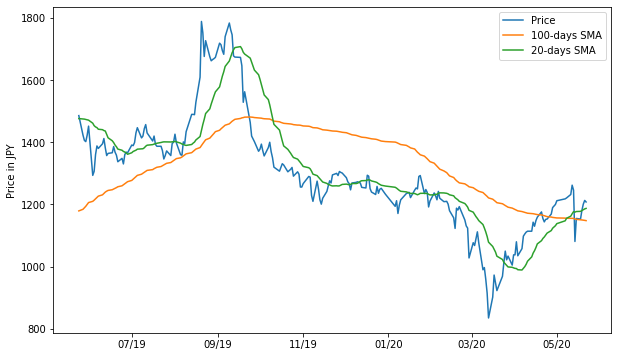

In [0]:
start_date = '2019-05-24'
end_date = '2020-05-22'

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Adj Close'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Adj Close'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Adj Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in JPY')
ax.xaxis.set_major_formatter(my_year_month_fmt)

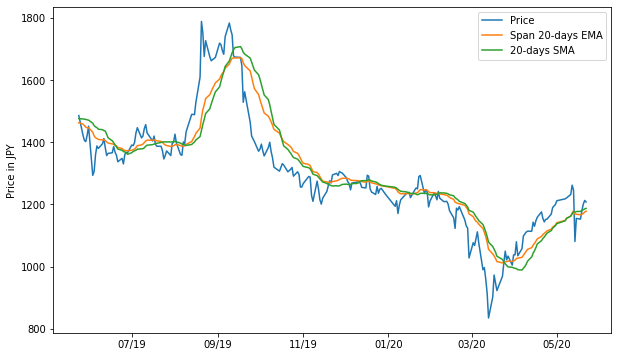

In [0]:
# Using Pandas to calculate a 20-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
ema_short = data.ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Adj Close'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Adj Close'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Adj Close'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in JPY')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [0]:
# Taking the difference between the prices and the EMA timeseries
trading_positions_raw = data - ema_short
trading_positions_raw.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-19,-8.293876,8.064482,2.681096,12.665815,12.665817,-11071.636847
2020-05-20,6.067446,23.582150,29.568611,29.554785,29.554787,-18612.433338
2020-05-21,23.584832,20.431469,38.514458,37.597187,37.597188,-11049.344448
2020-05-22,34.910086,20.295139,40.274985,29.492693,29.492694,-9816.073549
2020-05-25,38.823411,31.933697,52.724987,36.636246,36.636247,-7885.971306


In [0]:
# Taking the sign of the difference to determine whether the price or the EMA is greater and then multiplying by 1/3
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-19,-0.333333,0.333333,0.333333,0.333333,0.333333,-0.333333
2020-05-20,0.333333,0.333333,0.333333,0.333333,0.333333,-0.333333
2020-05-21,0.333333,0.333333,0.333333,0.333333,0.333333,-0.333333
2020-05-22,0.333333,0.333333,0.333333,0.333333,0.333333,-0.333333
2020-05-25,0.333333,0.333333,0.333333,0.333333,0.333333,-0.333333


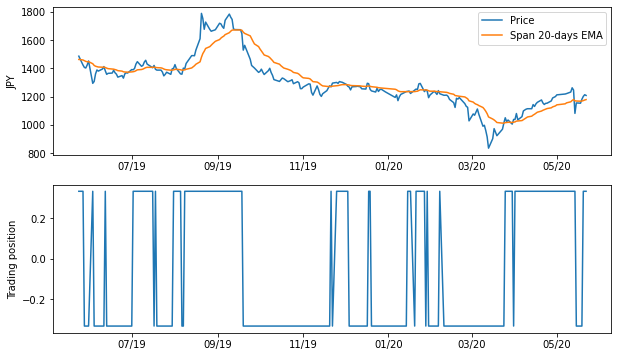

In [0]:
# Lagging our trading signals by one day.
trading_positions_final = trading_positions.shift(1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Adj Close'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Adj Close'], label = 'Span 20-days EMA')

ax1.set_ylabel('JPY')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'Adj Close'], 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [0]:
asset_log_returns = np.log(data).diff()
asset_log_returns.head()
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-19,-0.002891,-0.011608,-0.007372,-0.007998,-0.007998,-0.099498
2020-05-20,-0.004290,0.004971,0.008636,0.005598,0.005598,0.121978
2020-05-21,0.005636,-0.000274,0.003674,0.003314,0.003314,-0.086858
2020-05-22,0.004165,0.000548,0.001682,-0.001377,-0.001377,-0.002381
2020-05-25,0.002200,0.004083,0.004996,0.003022,0.003022,-0.012800


## Cumulative Returns

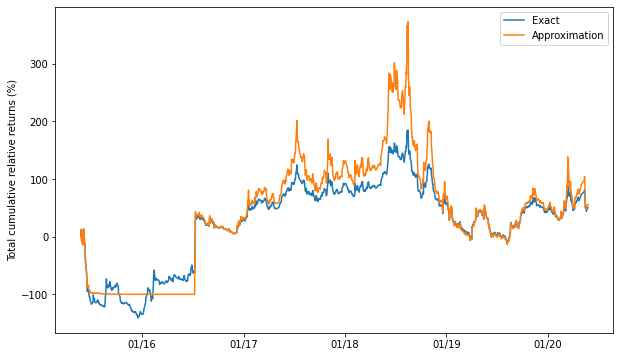

In [0]:
# Total strategy relative returns. This is the exact calculation.
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = np.exp(cum_strategy_log_return) - 1

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_year_month_fmt)

## Portfolio (Profit and Loss)

In [0]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 365):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(100*total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100*average_yearly_return) + '%')

print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 50.09%
Average yearly return is: 12.66%


## Trading strategy

In [0]:
df = data
short_window = 40
long_window = 100
signals = pd.DataFrame(index = df.index)
signals['signal'] = 0.0
signals['short_mavg'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]  > signals['long_mavg'][short_window:], 1.0, 0.0)   

signals['positions'] = signals['signal'].diff()

In [0]:
initial_capital= float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['Falcom'] = 100 * signals['signal']   
portfolio = positions.multiply(df['Adj Close'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(df['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'], axis=0)).sum(axis=1).cumsum()   
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()
portfolio

,Falcom,holdings,cash,total,returns
Date,,,,,
2015-05-25,0.0,0.0,100000.0000,100000.0000,NaN
2015-05-26,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-27,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-28,0.0,0.0,100000.0000,100000.0000,0.0
2015-05-29,0.0,0.0,100000.0000,100000.0000,0.0
...,...,...,...,...,...
2020-05-19,0.0,0.0,138612.9396,138612.9396,0.0
2020-05-20,0.0,0.0,138612.9396,138612.9396,0.0
2020-05-21,0.0,0.0,138612.9396,138612.9396,0.0


## The blue dots in the graph represent the correct time, value, place to buy assets/stocks
## The green triangles in the graph represent the correct time, value, place to sell assets/stocks


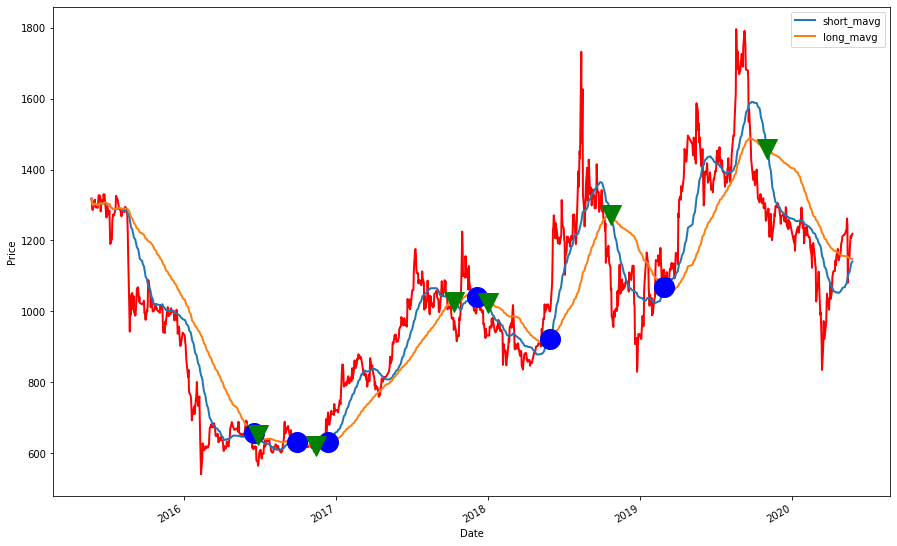

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price')
df['Close'].plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2., figsize = (15, 10))

# Plotting the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         'o', markersize=20, color='blue', label = 'buy stocks')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=20, color='green', label = 'sell stocks')
plt.show()